# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# **Data Collection**

In [2]:
!gdown 1jAmbk9bYSJHW2AykVtuJc5joAQ2yllTc

Downloading...
From: https://drive.google.com/uc?id=1jAmbk9bYSJHW2AykVtuJc5joAQ2yllTc
To: /content/loan_data_2007_2014.csv
100% 240M/240M [00:03<00:00, 66.3MB/s]


# **Data Understanding**

In [3]:
data = pd.read_csv('loan_data_2007_2014.csv')
data.head()

<ipython-input-3-8f6528938b99>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Terdapat 75 fitur pada dataset yang terbagi menjadi 2 tipe yaitu numerik (float dan int) dan object. Fitur yang ada pada dataset terlalu banyak untuk dilakukan pemodelan sehingga diperlukan eliminasi fitur-fitur yang akan digunakan dalam membuat prediksi credit risk. Fitur-fitur yang berhubungan dalam melakukan prediksi credit risk yaitu annual_inc, funded_amnt, grade, home_ownership, installment, int_rate, last_pymnt_amnt, loan_amnt, out_prncp_inv, purpose, recoveries, revol_util, term, total_pymnt, total_pymnt_inv, total_rec_int, total_rec_late_fee, total_rec_prncp, loan_status,  dan verification_status

In [5]:
data.drop(data.columns.difference([ 'annual_inc', 'funded_amnt', 'grade', 'home_ownership',
    'installment', 'int_rate', 'last_pymnt_amnt', 'loan_amnt', 'out_prncp_inv',
    'purpose', 'recoveries', 'revol_util', 'term', 'total_pymnt',
    'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp','loan_status',
    'verification_status']),1,inplace=True)
data.head()

<ipython-input-5-4b66b5dd48c8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(data.columns.difference([ 'annual_inc', 'funded_amnt', 'grade', 'home_ownership',


,loan_amnt,funded_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,revol_util,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
0,5000,5000,36 months,10.65,162.87,B,RENT,24000.0,Verified,Fully Paid,credit_card,83.7,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62
1,2500,2500,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,Charged Off,car,9.4,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,119.66
2,2400,2400,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,Fully Paid,small_business,98.5,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91
3,10000,10000,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,Fully Paid,other,21.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,357.48
4,3000,3000,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,Current,other,53.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   term                 466285 non-null  object 
 3   int_rate             466285 non-null  float64
 4   installment          466285 non-null  float64
 5   grade                466285 non-null  object 
 6   home_ownership       466285 non-null  object 
 7   annual_inc           466281 non-null  float64
 8   verification_status  466285 non-null  object 
 9   loan_status          466285 non-null  object 
 10  purpose              466285 non-null  object 
 11  revol_util           465945 non-null  float64
 12  out_prncp_inv        466285 non-null  float64
 13  total_pymnt          466285 non-null  float64
 14  total_pymnt_inv      466285 non-null  float64
 15  total_rec_prncp  

Setelah dilakukan seleksi fitur, maka didapatkan fitur-fitur yang akan digunakan sebanyak 20 fitur.

In [7]:
data.isnull().sum()

loan_amnt                0
funded_amnt              0
term                     0
int_rate                 0
installment              0
grade                    0
home_ownership           0
annual_inc               4
verification_status      0
loan_status              0
purpose                  0
revol_util             340
out_prncp_inv            0
total_pymnt              0
total_pymnt_inv          0
total_rec_prncp          0
total_rec_int            0
total_rec_late_fee       0
recoveries               0
last_pymnt_amnt          0
dtype: int64

In [9]:
data['revol_util'].value_counts()

0.00      2284
58.00      864
53.00      850
59.00      845
61.00      832
          ... 
8.49         1
88.48        1
7.43         1
11.63        1
141.80       1
Name: revol_util, Length: 1269, dtype: int64

In [10]:
data['revol_util'].fillna(0, inplace=True)
data['annual_inc'].fillna(0, inplace=True)

Dilakukan pengecekan null value yang didapati bahwa kolom annual_inc memiliki missing value sebanyak 4 dan kolom revol_util sebanyak 340. Kedua kolom tersebut diisi dengan nilai nol.

In [11]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Selanjutnya dilakukan pengecekan nilai dari kolom loan_status yang menandakan status pinjaman saat ini dan didapati nilai kategori seperti diatas. Pada kasus ini akan dibuat model untuk memprediksi credit risk sehingga akan dibedakan menjadi kolom credit_risk_status yang menandakan bahwa 0 memiliki risiko yang rendah sedangkan 1 memiliki risiko yang tinggi.

In [12]:
# Membuat kolom baru "credit_risk_status" berdasarkan nilai pada "loan_status"
# 0 untuk ("Current", "Does not meet the credit policy. Status:Fully Paid","Fully Paid")
# 1 untuk ("Charged Off","Late (31-120 days)","In Grace Period","Late (16-30 days)","Default", dan "Does not meet the credit policy. Status:Charged Off")
data['credit_risk_status'] = data['loan_status'].map({'Current': 0,
                                                  'Does not meet the credit policy. Status:Fully Paid': 0,
                                                  'Fully Paid': 0,
                                                  'Charged Off': 1,
                                                  'Late (31-120 days)': 1,
                                                  'In Grace Period': 1,
                                                  'Late (16-30 days)': 1,
                                                  'Default': 1,
                                                  'Does not meet the credit policy. Status:Charged Off': 1})

# Menghapus kolom "loan_status"
data.drop(columns=['loan_status'], inplace=True)

In [13]:
data['grade'].value_counts()

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

In [14]:
# Melakukan label encoding pada kolom "grade"
data['grade'] = data['grade'].map({'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1, 'F': 1, 'G': 1})

Pada kolom grade terdapat nilai berupa kategorik dengan huruf A, B, C, D, E, F, G yang menandakan kelas pinjaman sehingga perlu dilakukan pelabelan dengan angka

In [15]:
data['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [16]:
data['home_ownership'] = data['home_ownership'].map({'ANY': 0, 'NONE': 0, 'OTHER': 0, 'RENT': 1, 'MORTGAGE': 2, 'OWN': 3})

Pada kolom home_ownership terdapat nilai berupa kategori kepemilikan rumah dari peminjam sehingga perlu dilakukan pelabelan dengan angka dimana semakin besar angkanya menandakan makin baik dalam melakukan pembayaran.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   term                 466285 non-null  object 
 3   int_rate             466285 non-null  float64
 4   installment          466285 non-null  float64
 5   grade                466285 non-null  int64  
 6   home_ownership       466285 non-null  int64  
 7   annual_inc           466285 non-null  float64
 8   verification_status  466285 non-null  object 
 9   purpose              466285 non-null  object 
 10  revol_util           466285 non-null  float64
 11  out_prncp_inv        466285 non-null  float64
 12  total_pymnt          466285 non-null  float64
 13  total_pymnt_inv      466285 non-null  float64
 14  total_rec_prncp      466285 non-null  float64
 15  total_rec_int    

# **Exploratory Data Analysis**

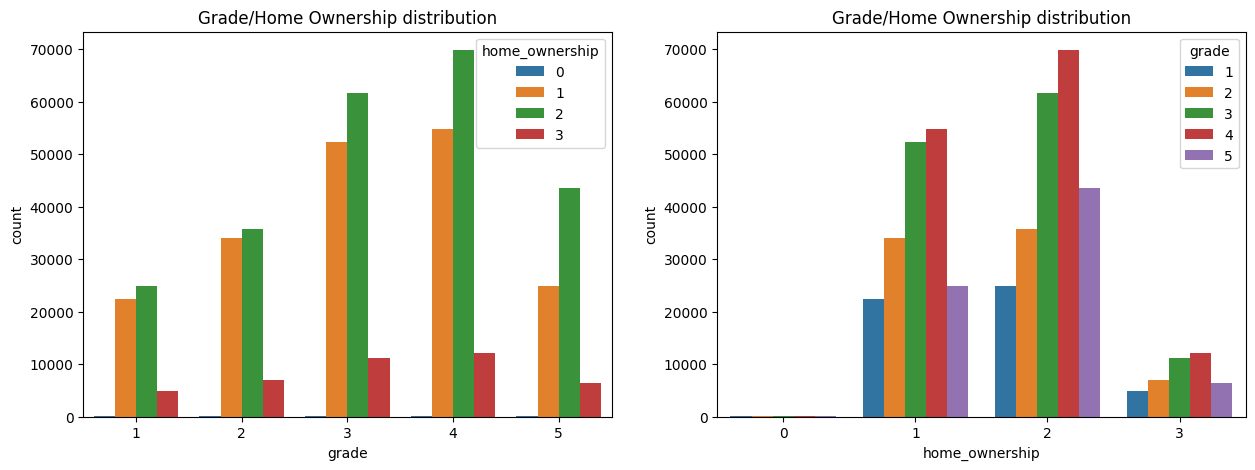

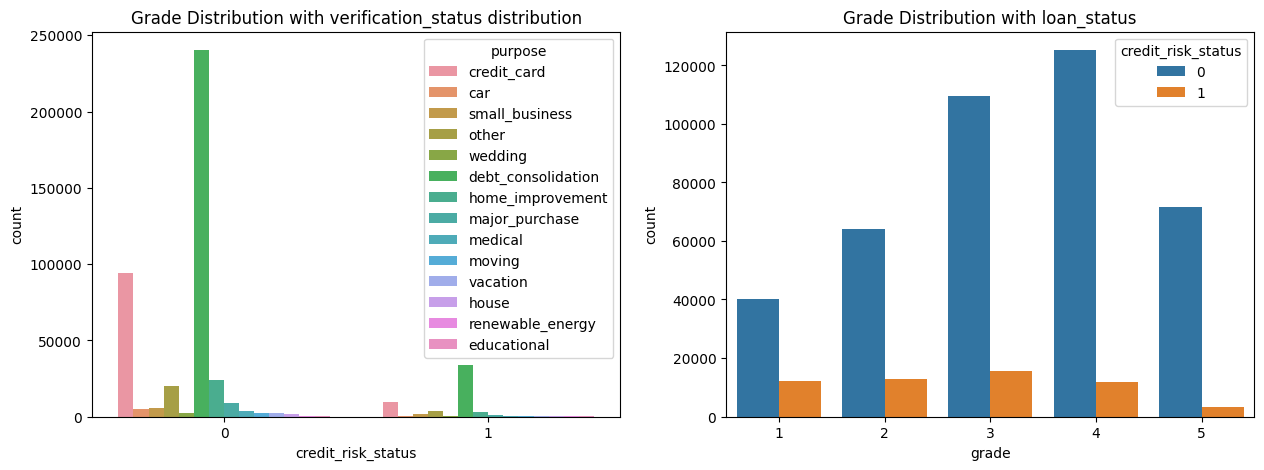

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=data, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=data, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=data, x='credit_risk_status', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=data, x='grade', hue='credit_risk_status', ax=ax[1]).set_title("Grade Distribution with loan_status");

**ANALISIS**
1. Jumlah peminjam dengan grade tinggi akan lebih sedikit dibandingkan dengan nilai rendah
2. Sebagian besar tujuan peminjam uang dari label 0 dan 1 adalah pelunasan utang
3. Jumlah grade tertinggi yang mampu menyelesaikan pinjaman adalah grade 4, sedangkan yang paling banyak gagal menyelesaikan pinjaman adalah grade 3

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

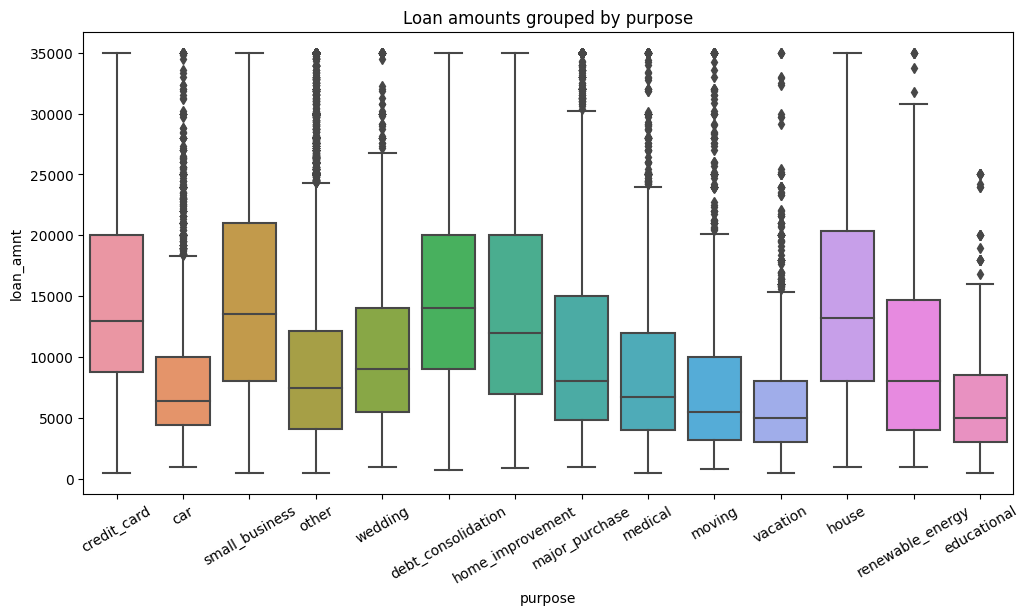

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=data)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

Terdapat 5 kategori tertinggi untuk jumlah kredit dengan tujuan sebagai berikut: Kartu kredit, bisnis UMKM, konsolidasi utang, perbaikan rumah, dan membeli rumah

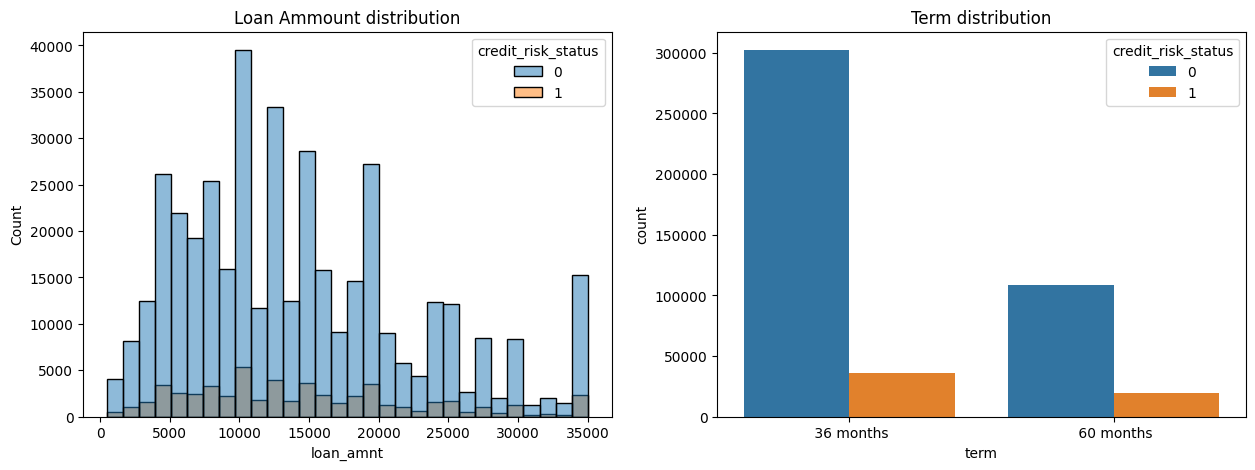

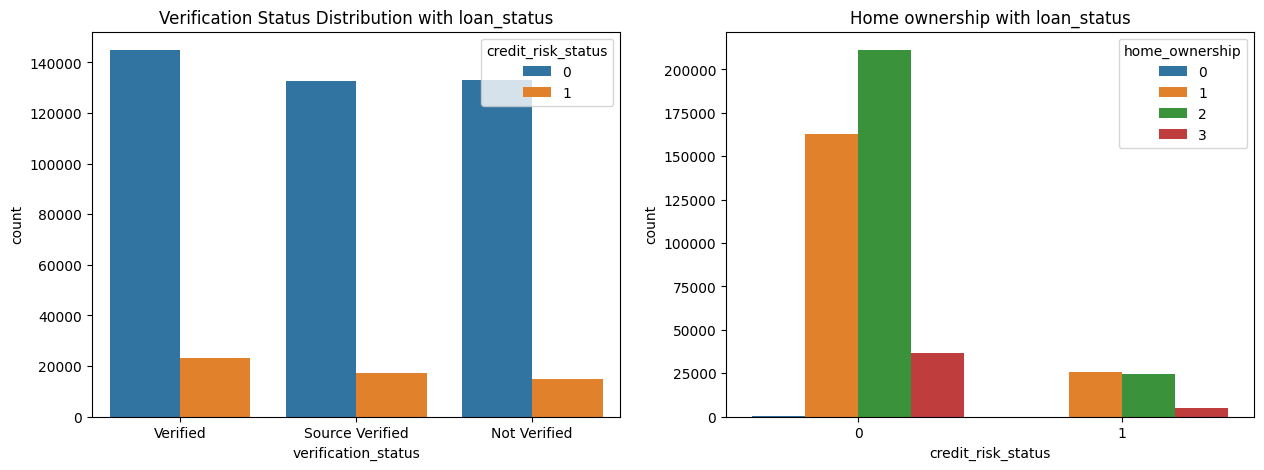

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data, x='loan_amnt',hue="credit_risk_status", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=data, x='term', hue="credit_risk_status", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=data, hue='home_ownership', x='credit_risk_status', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=data, x='verification_status', hue='credit_risk_status', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

1. Nilai nominal utang terbesar adalah 10.000 USD
2. Jatuh tempo maksimum adalah 36 bulan, sedangkan untuk 60 bulan hampir sepertiganya
3. Sebagian besar kredit yang dapat dibayar penuh diperoleh dari status verifikasi "Terverifikasi"

# **Preprocessing**

In [24]:
data['term'] = data['term'].str.replace(' months', '').astype(int)

In [25]:
# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom "verification_status"
data['verification_status'] = label_encoder.fit_transform(data['verification_status'])

# Melakukan label encoding pada kolom "purpose"
data['purpose'] = label_encoder.fit_transform(data['purpose'])

# Melakukan label encoding pada kolom "term"
data['term'] = label_encoder.fit_transform(data['term'])

In [26]:
data.isnull().sum()

loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
revol_util             0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
total_rec_late_fee     0
recoveries             0
last_pymnt_amnt        0
credit_risk_status     0
dtype: int64

In [27]:
X, y = data.drop("credit_risk_status", axis=1), data["credit_risk_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling**

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_model = DecisionTreeClassifier()

# Latih model Decision Tree pada data latih
dt_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = dt_model.predict(X_test)

# Evaluasi kinerja model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[80077  2100]
 [ 1944  9136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     82177
           1       0.81      0.82      0.82     11080

    accuracy                           0.96     93257
   macro avg       0.89      0.90      0.90     93257
weighted avg       0.96      0.96      0.96     93257



In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model Random Forest pada data latih
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi kinerja model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[82038   139]
 [ 2205  8875]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     82177
           1       0.98      0.80      0.88     11080

    accuracy                           0.97     93257
   macro avg       0.98      0.90      0.93     93257
weighted avg       0.98      0.97      0.97     93257

